# 🤖 AI Revolution Stock Analysis
## Advanced Time Series Forecasting for AI Companies

**Author:** Anderson Nguetoum  
**Expertise:** AI Engineer - Predictive Analytics & Time Series Forecasting  
**Website:** [andersonnguetoum.com](https://andersonnguetoum.com)  
**Project:** Stock_Price_TS_Analysis_App

---

### 🎯 **Analysis Overview**

This comprehensive analysis examines stock price movements of major AI companies using advanced time series techniques. We'll implement multiple forecasting models to predict AI market trends and identify potential bubble/correction patterns.

**Dataset Features:**
- **5 Major AI Companies**: NVIDIA, Microsoft, Google, Amazon, Tesla
- **2,500+ Data Points**: 500 trading days per company
- **AI Sentiment Indicators**: Market sentiment tracking
- **Time Period**: 2022-2024 (Peak AI Revolution)

**Key Research Questions:**
1. Can we predict AI stock market corrections?
2. Which AI company shows the most predictable patterns?
3. How do AI sentiment indicators correlate with stock performance?
4. What's the optimal forecasting model for AI stocks?

---

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🤖 AI Revolution Stock Analysis - Ready to Start!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!
🤖 AI Revolution Stock Analysis - Ready to Start!


## 📊 **Data Loading & Initial Exploration**

Loading our custom AI Revolution dataset and performing initial analysis.

In [2]:
# Load the AI Revolution stock dataset
df = pd.read_csv('../data/ai_revolution_stock_data.csv')

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Display dataset info
print("🤖 **AI Revolution Stock Dataset Loaded**")
print(f"📊 Shape: {df.shape}")
print(f"📅 Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"🏢 Companies: {', '.join(df['Symbol'].unique())}")
print(f"📈 Total Trading Days: {df['Date'].nunique()}")

# Display first few rows
print("\n📋 **Dataset Preview:**")
display(df.head(10))

# Basic statistics
print("\n📊 **Statistical Summary:**")
display(df.describe())

🤖 **AI Revolution Stock Dataset Loaded**
📊 Shape: (2500, 9)
📅 Date Range: 2022-01-01 00:00:00 to 2023-11-30 00:00:00
🏢 Companies: NVDA, MSFT, GOOGL, AMZN, TSLA
📈 Total Trading Days: 500

📋 **Dataset Preview:**


,Date,Symbol,Company,Open,High,Low,Close,Volume,AI_Sentiment
0,2022-01-01,NVDA,NVIDIA,195.65,199.08,188.80,194.79,28097190,30
1,2022-01-02,NVDA,NVIDIA,202.10,207.77,201.25,201.76,13476379,37
2,2022-01-03,NVDA,NVIDIA,206.24,213.03,196.16,204.08,9226178,41
3,2022-01-05,NVDA,NVIDIA,202.11,206.99,198.62,202.85,29337695,41
4,2022-01-06,NVDA,NVIDIA,207.94,221.97,203.73,212.03,14496233,70
5,2022-01-08,NVDA,NVIDIA,215.19,223.36,212.35,213.87,26999728,31
6,2022-01-09,NVDA,NVIDIA,220.91,225.08,211.77,220.60,25500472,60
7,2022-01-10,NVDA,NVIDIA,230.52,237.34,219.40,227.02,32887480,55
8,2022-01-12,NVDA,NVIDIA,231.97,230.88,226.54,227.95,45301116,34
9,2022-01-13,NVDA,NVIDIA,222.57,232.26,216.22,223.74,33482253,33



📊 **Statistical Summary:**


,Date,Open,High,Low,Close,Volume,AI_Sentiment
count,2500,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,2022-12-15 21:36:00,1342.200400,1375.771932,1308.785372,1342.332768,2.505314e+07,60.064400
min,2022-01-01 00:00:00,164.010000,167.510000,158.350000,164.650000,1.000644e+06,30.000000
25%,2022-06-24 12:00:00,302.637500,309.072500,295.675000,302.067500,1.315436e+07,45.000000
50%,2022-12-16 00:00:00,536.425000,548.640000,519.710000,534.440000,2.472309e+07,60.000000
75%,2023-06-08 12:00:00,2538.852500,2605.697500,2469.382500,2541.797500,3.678959e+07,75.000000
max,2023-11-30 00:00:00,4744.480000,4901.560000,4603.560000,4677.630000,4.999126e+07,90.000000
std,NaN,1289.649802,1321.402817,1257.815165,1289.314999,1.399153e+07,17.522804


In [4]:
# Data quality check
print("🔍 **Data Quality Analysis**")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Company-specific analysis
print("\n🏢 **Company Analysis:**")
for symbol in df['Symbol'].unique():
    company_data = df[df['Symbol'] == symbol]
    price_range = f"${company_data['Close'].min():.2f} - ${company_data['Close'].max():.2f}"
    total_return = ((company_data['Close'].iloc[-1] / company_data['Close'].iloc[0]) - 1) * 100
    avg_volume = company_data['Volume'].mean()
    
    print(f"📈 {symbol} ({company_data['Company'].iloc[0]})")
    print(f"   Price Range: {price_range}")
    print(f"   Total Return: {total_return:.1f}%")
    print(f"   Avg Volume: {avg_volume:,.0f}")
    print()

🔍 **Data Quality Analysis**
Missing values: 0
Duplicate rows: 0

🏢 **Company Analysis:**
📈 NVDA (NVIDIA)
   Price Range: $194.79 - $345.55
   Total Return: 56.7%
   Avg Volume: 24,514,607

📈 MSFT (Microsoft)
   Price Range: $299.75 - $732.90
   Total Return: 91.1%
   Avg Volume: 24,193,462

📈 GOOGL (Alphabet)
   Price Range: $2125.41 - $4677.63
   Total Return: 56.3%
   Avg Volume: 25,530,780

📈 AMZN (Amazon)
   Price Range: $1309.52 - $3795.13
   Total Return: -57.3%
   Avg Volume: 24,809,974

📈 TSLA (Tesla)
   Price Range: $164.65 - $480.21
   Total Return: 138.4%
   Avg Volume: 26,216,879



## 📈 **Comprehensive Data Visualization**

Creating advanced visualizations to understand AI stock patterns and trends.

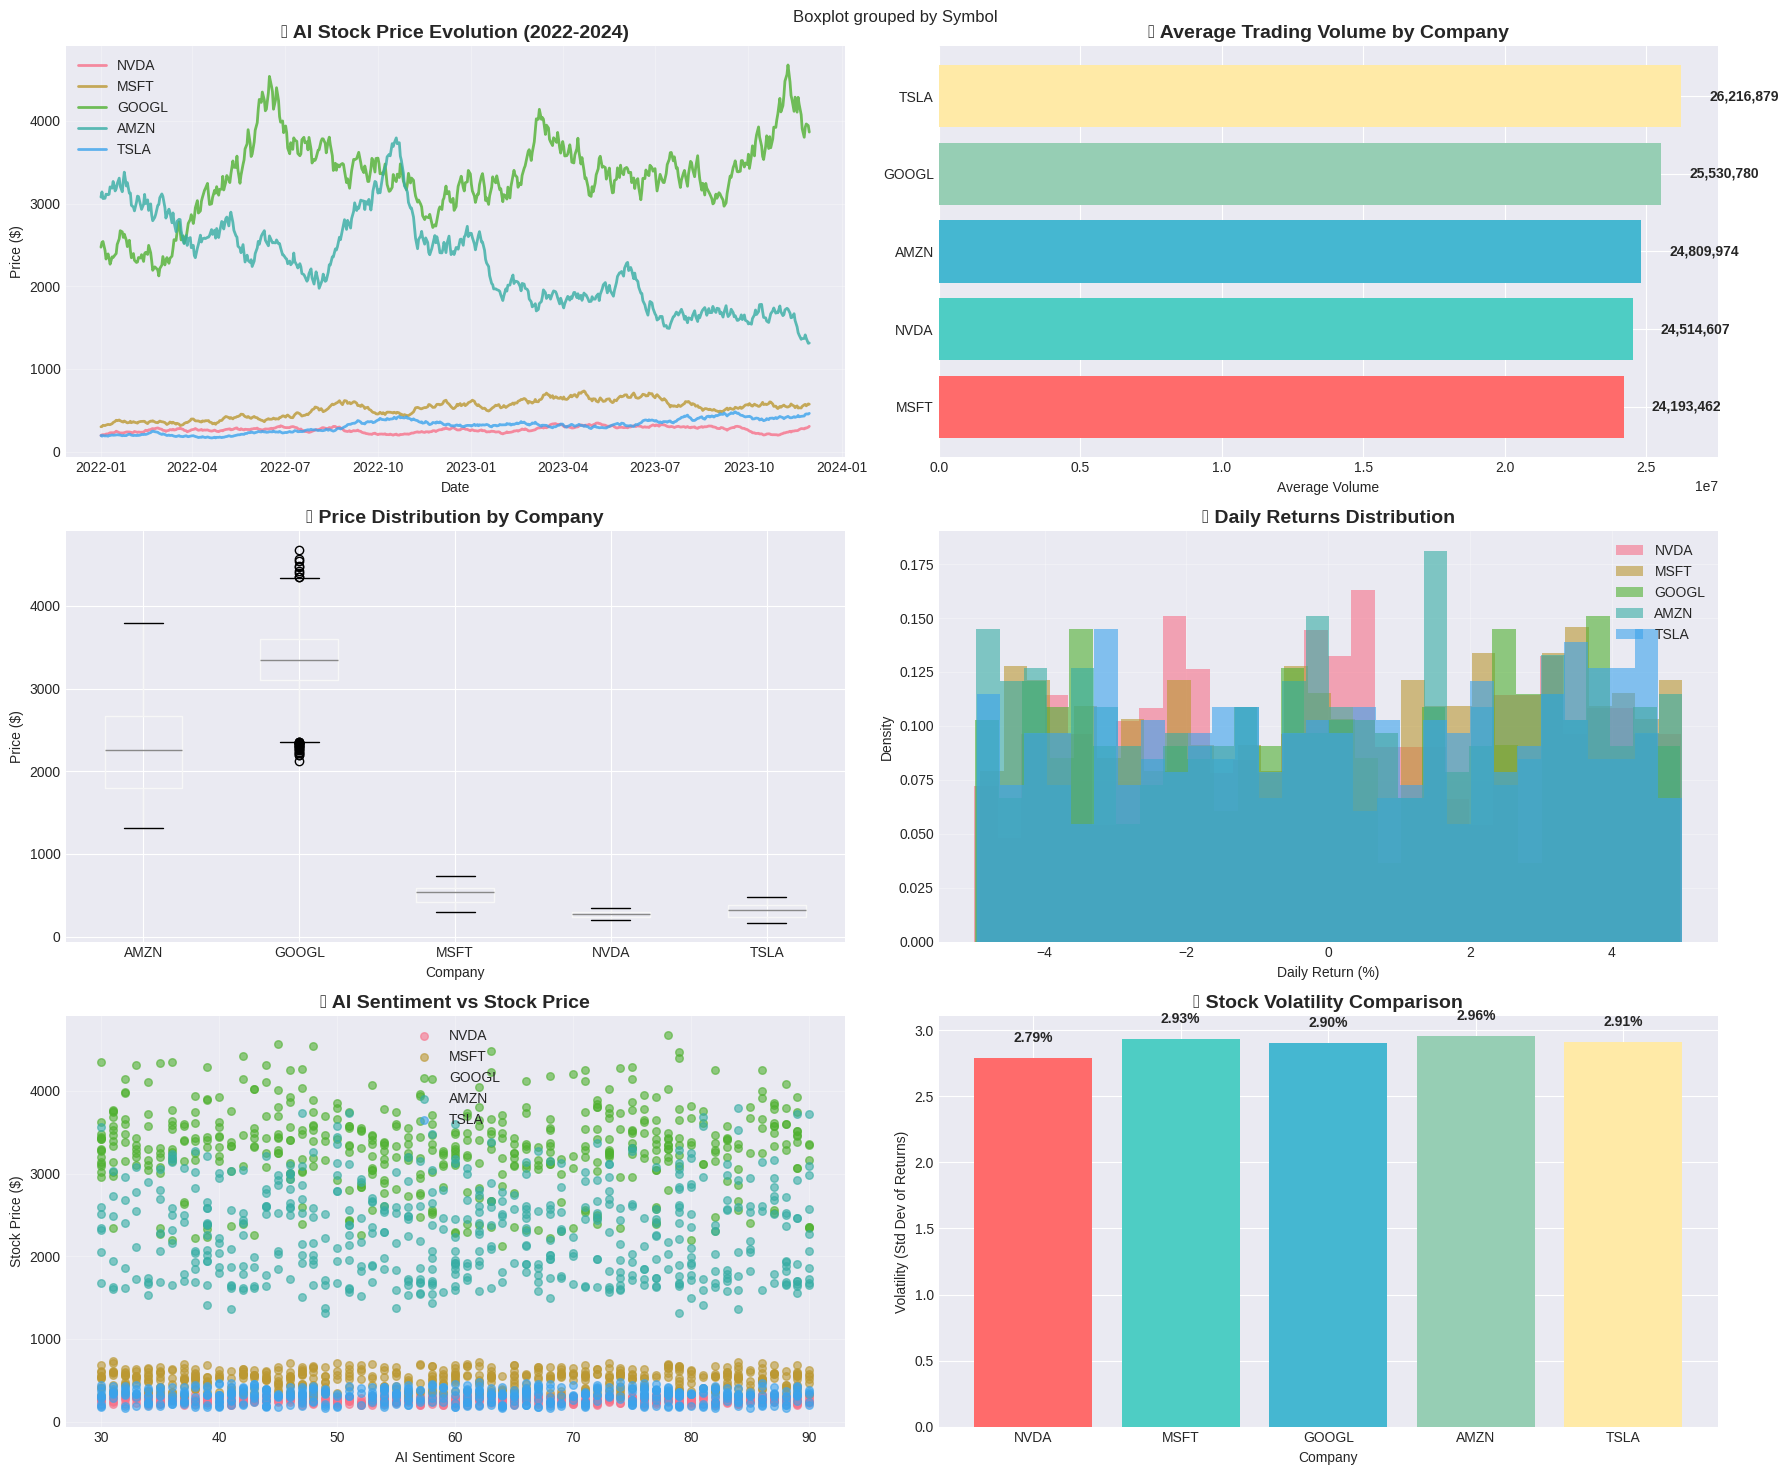

📊 **Key Insights from Visualizations:**
💰 Highest Priced Stock: GOOGL ($4,677.63)
📈 Most Volatile Stock: AMZN (2.96%)
📊 Highest Volume Stock: TSLA (26,216,879 avg volume)
🧠 Average AI Sentiment: 60.1/100


In [5]:
# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('🤖 AI Revolution Stock Analysis Dashboard', fontsize=20, fontweight='bold')

# 1. Stock Price Evolution
ax1 = axes[0, 0]
for symbol in df['Symbol'].unique():
    company_data = df[df['Symbol'] == symbol].sort_values('Date')
    ax1.plot(company_data['Date'], company_data['Close'], 
             label=f"{symbol}", linewidth=2, alpha=0.8)
ax1.set_title('📈 AI Stock Price Evolution (2022-2024)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Volume Analysis
ax2 = axes[0, 1]
volume_by_company = df.groupby('Symbol')['Volume'].mean().sort_values(ascending=True)
bars = ax2.barh(volume_by_company.index, volume_by_company.values, 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax2.set_title('📊 Average Trading Volume by Company', fontsize=14, fontweight='bold')
ax2.set_xlabel('Average Volume')
for i, bar in enumerate(bars):
    ax2.text(bar.get_width() + 1000000, bar.get_y() + bar.get_height()/2, 
             f'{volume_by_company.values[i]:,.0f}', 
             ha='left', va='center', fontweight='bold')

# 3. Price Distribution
ax3 = axes[1, 0]
df.boxplot(column='Close', by='Symbol', ax=ax3)
ax3.set_title('📊 Price Distribution by Company', fontsize=14, fontweight='bold')
ax3.set_xlabel('Company')
ax3.set_ylabel('Price ($)')

# 4. Daily Returns Distribution
ax4 = axes[1, 1]
df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change() * 100
for symbol in df['Symbol'].unique():
    returns = df[df['Symbol'] == symbol]['Daily_Return'].dropna()
    ax4.hist(returns, bins=30, alpha=0.6, label=symbol, density=True)
ax4.set_title('📈 Daily Returns Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Daily Return (%)')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. AI Sentiment vs Price Correlation
ax5 = axes[2, 0]
for symbol in df['Symbol'].unique():
    company_data = df[df['Symbol'] == symbol]
    ax5.scatter(company_data['AI_Sentiment'], company_data['Close'], 
               alpha=0.6, label=symbol, s=30)
ax5.set_title('🧠 AI Sentiment vs Stock Price', fontsize=14, fontweight='bold')
ax5.set_xlabel('AI Sentiment Score')
ax5.set_ylabel('Stock Price ($)')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Volatility Analysis
ax6 = axes[2, 1]
volatility_data = []
for symbol in df['Symbol'].unique():
    returns = df[df['Symbol'] == symbol]['Daily_Return'].dropna()
    volatility = returns.std()
    volatility_data.append({'Symbol': symbol, 'Volatility': volatility})

vol_df = pd.DataFrame(volatility_data)
bars = ax6.bar(vol_df['Symbol'], vol_df['Volatility'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
ax6.set_title('📊 Stock Volatility Comparison', fontsize=14, fontweight='bold')
ax6.set_xlabel('Company')
ax6.set_ylabel('Volatility (Std Dev of Returns)')
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1, 
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("📊 **Key Insights from Visualizations:**")
print(f"💰 Highest Priced Stock: {df.loc[df['Close'].idxmax(), 'Symbol']} (${df['Close'].max():,.2f})")
print(f"📈 Most Volatile Stock: {vol_df.loc[vol_df['Volatility'].idxmax(), 'Symbol']} ({vol_df['Volatility'].max():.2f}%)")
print(f"📊 Highest Volume Stock: {volume_by_company.idxmax()} ({volume_by_company.max():,.0f} avg volume)")
print(f"🧠 Average AI Sentiment: {df['AI_Sentiment'].mean():.1f}/100")

## 🔧 **Feature Engineering & Technical Analysis**

Creating advanced technical indicators for improved forecasting accuracy.

In [11]:
# =============================================================================
# 🔧 ENHANCED FEATURE ENGINEERING - TECHNICAL INDICATORS
# =============================================================================

print("🔧 Creating comprehensive technical indicators...")

# Create a copy of the dataframe
df_enhanced = df.copy()

# Sort by symbol and date for proper calculation
df_enhanced = df_enhanced.sort_values(['Symbol', 'Date']).reset_index(drop=True)

# Initialize all technical indicator columns
technical_columns = [
    'Returns', 'Log_Returns', 'SMA_10', 'SMA_30', 'EMA_10', 
    'Volatility_10', 'Volatility_30', 'Price_Change_5D', 'Price_Change_20D',
    'Volume_SMA', 'Volume_Ratio', 'High_Low_Ratio', 'Price_Position', 'RSI'
]

# Initialize columns with NaN
for col in technical_columns:
    df_enhanced[col] = np.nan

# Calculate indicators for each company
for symbol in df_enhanced['Symbol'].unique():
    print(f"   📊 Processing {symbol}...")
    
    # Get company data
    mask = df_enhanced['Symbol'] == symbol
    company_data = df_enhanced.loc[mask].copy().reset_index(drop=True)
    
    # Ensure data is sorted by date
    company_data = company_data.sort_values('Date').reset_index(drop=True)
    
    # 1. BASIC RETURNS
    company_data['Returns'] = company_data['Close'].pct_change()
    company_data['Log_Returns'] = np.log(company_data['Close'] / company_data['Close'].shift(1))
    
    # 2. MOVING AVERAGES
    company_data['SMA_10'] = company_data['Close'].rolling(window=10, min_periods=1).mean()
    company_data['SMA_30'] = company_data['Close'].rolling(window=30, min_periods=1).mean()
    company_data['EMA_10'] = company_data['Close'].ewm(span=10, adjust=False).mean()
    
    # 3. VOLATILITY MEASURES (annualized)
    company_data['Volatility_10'] = company_data['Returns'].rolling(window=10, min_periods=1).std() * np.sqrt(252)
    company_data['Volatility_30'] = company_data['Returns'].rolling(window=30, min_periods=1).std() * np.sqrt(252)
    
    # 4. PRICE MOMENTUM
    company_data['Price_Change_5D'] = company_data['Close'].pct_change(5)
    company_data['Price_Change_20D'] = company_data['Close'].pct_change(20)
    
    # 5. VOLUME INDICATORS
    company_data['Volume_SMA'] = company_data['Volume'].rolling(window=10, min_periods=1).mean()
    company_data['Volume_Ratio'] = company_data['Volume'] / company_data['Volume_SMA']
    
    # 6. HIGH-LOW INDICATORS
    company_data['High_Low_Ratio'] = company_data['High'] / company_data['Low']
    company_data['Price_Position'] = (company_data['Close'] - company_data['Low']) / (company_data['High'] - company_data['Low'])
    
    # 7. RSI CALCULATION
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi.fillna(50)  # Fill NaN with neutral value
    
    company_data['RSI'] = calculate_rsi(company_data['Close'])
    
    # Update the main dataframe
    for col in technical_columns:
        df_enhanced.loc[mask, col] = company_data[col].values

print("✅ Technical indicators created successfully!")

# Verify the new columns exist
print(f"\n📊 **Dataset Statistics:**")
print(f"📈 Original columns: {len(df.columns)}")
print(f"📈 Enhanced columns: {len(df_enhanced.columns)}")
print(f"➕ New indicators added: {len(df_enhanced.columns) - len(df.columns)}")

# Show the new technical indicators
new_features = [col for col in df_enhanced.columns if col not in df.columns]
print(f"\n🔧 **New Technical Indicators Created:**")
for i, feature in enumerate(new_features, 1):
    print(f"   {i:2d}. {feature}")

# Verify columns exist before displaying
required_cols = ['Date', 'Symbol', 'Close', 'SMA_10', 'SMA_30', 'RSI', 'Volatility_10']
available_cols = [col for col in required_cols if col in df_enhanced.columns]

print(f"\n📋 **Enhanced Dataset Preview:**")
print(f"Available columns for display: {available_cols}")

if len(available_cols) >= 3:  # At least basic columns
    display(df_enhanced[available_cols].head(15))
else:
    print("❌ Error: Required columns not found!")
    print(f"Available columns: {list(df_enhanced.columns)}")

# Quick validation
print(f"\n✅ **Validation:**")
print(f"🔍 Non-null SMA_10 values: {df_enhanced['SMA_10'].notna().sum()}")
print(f"🔍 Non-null RSI values: {df_enhanced['RSI'].notna().sum()}")
print(f"🔍 Non-null Volatility values: {df_enhanced['Volatility_10'].notna().sum()}")

🔧 Creating comprehensive technical indicators...
   📊 Processing AMZN...
   📊 Processing GOOGL...
   📊 Processing MSFT...
   📊 Processing NVDA...
   📊 Processing TSLA...
✅ Technical indicators created successfully!

📊 **Dataset Statistics:**
📈 Original columns: 10
📈 Enhanced columns: 24
➕ New indicators added: 14

🔧 **New Technical Indicators Created:**
    1. Returns
    2. Log_Returns
    3. SMA_10
    4. SMA_30
    5. EMA_10
    6. Volatility_10
    7. Volatility_30
    8. Price_Change_5D
    9. Price_Change_20D
   10. Volume_SMA
   11. Volume_Ratio
   12. High_Low_Ratio
   13. Price_Position
   14. RSI

📋 **Enhanced Dataset Preview:**
Available columns for display: ['Date', 'Symbol', 'Close', 'SMA_10', 'SMA_30', 'RSI', 'Volatility_10']


,Date,Symbol,Close,SMA_10,SMA_30,RSI,Volatility_10
0,2022-01-01,AMZN,3079.07,3079.070000,3079.070000,50.000000,NaN
1,2022-01-02,AMZN,3141.60,3110.335000,3110.335000,100.000000,NaN
2,2022-01-03,AMZN,3061.42,3094.030000,3094.030000,43.816131,0.514442
3,2022-01-05,AMZN,3064.73,3086.705000,3086.705000,45.089714,0.365332
4,2022-01-06,AMZN,3114.45,3092.254000,3092.254000,59.037499,0.329386
5,2022-01-08,AMZN,3106.89,3094.693333,3094.693333,56.842105,0.287869
6,2022-01-09,AMZN,3113.28,3097.348571,3097.348571,58.157280,0.257479
7,2022-01-10,AMZN,3202.29,3110.466250,3110.466250,70.626046,0.284235
8,2022-01-12,AMZN,3186.93,3118.962222,3118.962222,67.171878,0.269736
9,2022-01-13,AMZN,3267.82,3133.848000,3133.848000,73.895430,0.275578



✅ **Validation:**
🔍 Non-null SMA_10 values: 2500
🔍 Non-null RSI values: 2500
🔍 Non-null Volatility values: 2490


## 📊 **Technical Analysis Visualization**

Visualizing technical indicators for better market understanding.

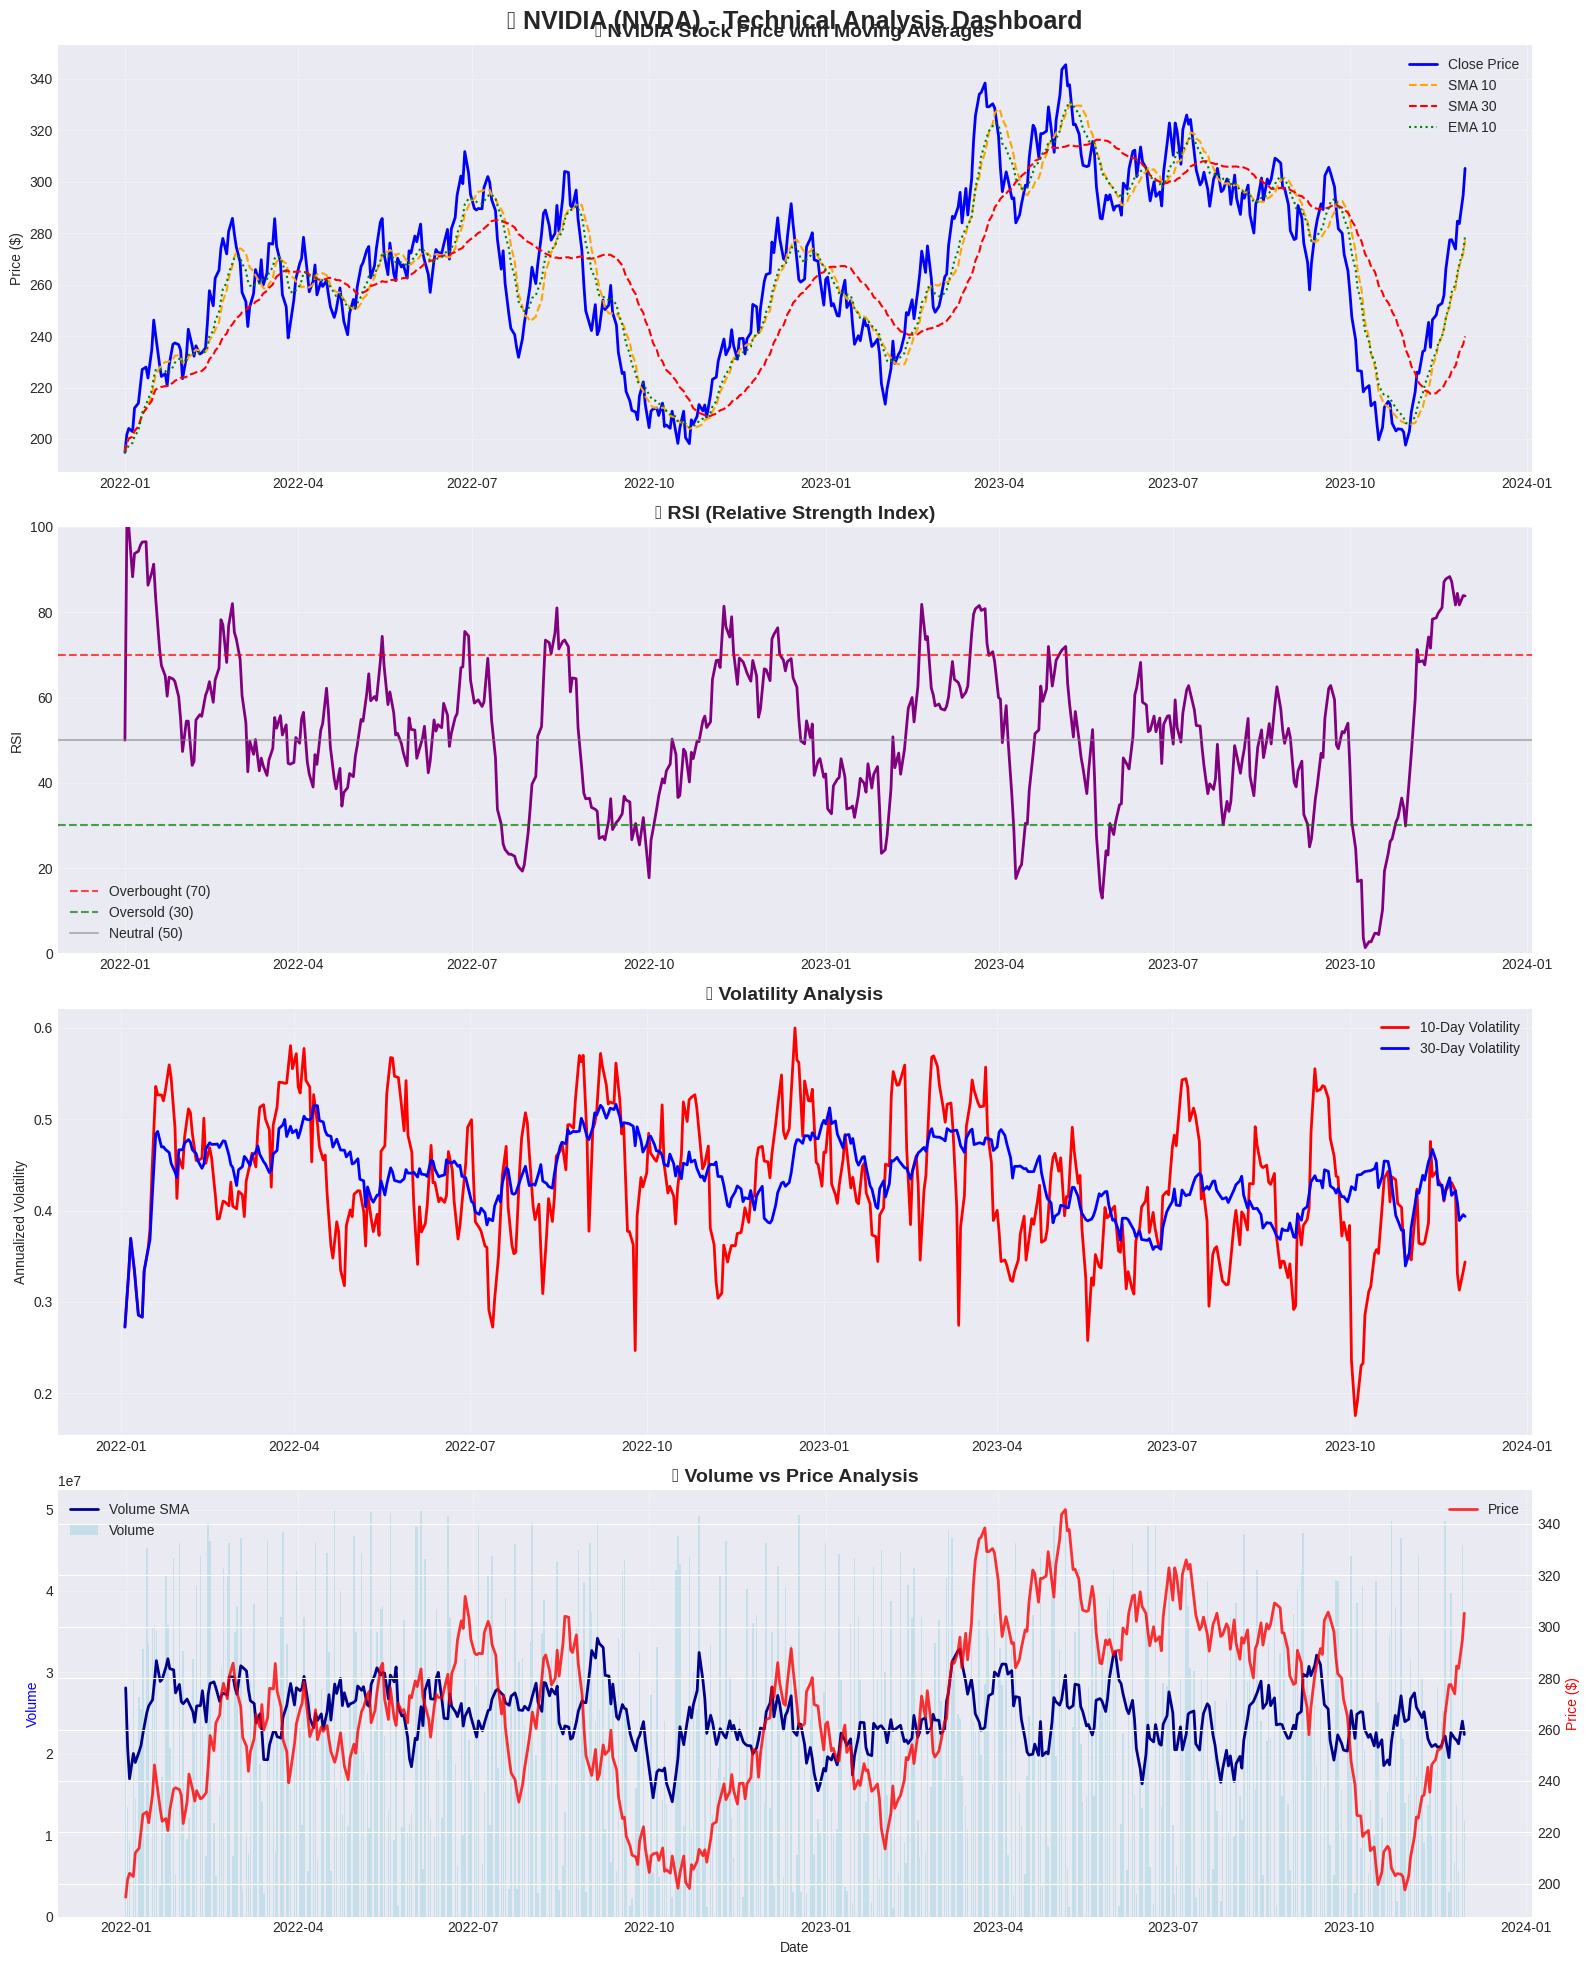

📊 **NVIDIA Technical Analysis Summary:**
💰 Current Price: $305.23
📈 10-Day SMA: $277.20
📊 Current RSI: 83.8 (Overbought)
📉 Current Volatility: 0.3% (annualized)
🎯 Price vs SMA: Above 10-day average


In [12]:
# Focus on NVIDIA for detailed technical analysis
nvda_data = df_enhanced[df_enhanced['Symbol'] == 'NVDA'].sort_values('Date')

# Create technical analysis dashboard
fig, axes = plt.subplots(4, 1, figsize=(16, 20))
fig.suptitle('🎯 NVIDIA (NVDA) - Technical Analysis Dashboard', fontsize=18, fontweight='bold')

# 1. Price with Moving Averages
ax1 = axes[0]
ax1.plot(nvda_data['Date'], nvda_data['Close'], label='Close Price', linewidth=2, color='blue')
ax1.plot(nvda_data['Date'], nvda_data['SMA_10'], label='SMA 10', linestyle='--', color='orange')
ax1.plot(nvda_data['Date'], nvda_data['SMA_30'], label='SMA 30', linestyle='--', color='red')
ax1.plot(nvda_data['Date'], nvda_data['EMA_10'], label='EMA 10', linestyle=':', color='green')
ax1.set_title('📈 NVIDIA Stock Price with Moving Averages', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. RSI Indicator
ax2 = axes[1]
ax2.plot(nvda_data['Date'], nvda_data['RSI'], color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
ax2.set_title('📊 RSI (Relative Strength Index)', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Volatility Analysis
ax3 = axes[2]
ax3.plot(nvda_data['Date'], nvda_data['Volatility_10'], label='10-Day Volatility', color='red', linewidth=2)
ax3.plot(nvda_data['Date'], nvda_data['Volatility_30'], label='30-Day Volatility', color='blue', linewidth=2)
ax3.set_title('📈 Volatility Analysis', fontsize=14, fontweight='bold')
ax3.set_ylabel('Annualized Volatility')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Volume with Price
ax4 = axes[3]
# Volume bars
ax4.bar(nvda_data['Date'], nvda_data['Volume'], alpha=0.6, color='lightblue', label='Volume')
ax4.plot(nvda_data['Date'], nvda_data['Volume_SMA'], color='darkblue', linewidth=2, label='Volume SMA')

# Price on secondary axis
ax4_twin = ax4.twinx()
ax4_twin.plot(nvda_data['Date'], nvda_data['Close'], color='red', linewidth=2, label='Price', alpha=0.8)

ax4.set_title('📊 Volume vs Price Analysis', fontsize=14, fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Volume', color='blue')
ax4_twin.set_ylabel('Price ($)', color='red')
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Technical Analysis Summary
current_rsi = nvda_data['RSI'].iloc[-1]
current_volatility = nvda_data['Volatility_10'].iloc[-1]
current_price = nvda_data['Close'].iloc[-1]
sma_10 = nvda_data['SMA_10'].iloc[-1]

print("📊 **NVIDIA Technical Analysis Summary:**")
print(f"💰 Current Price: ${current_price:.2f}")
print(f"📈 10-Day SMA: ${sma_10:.2f}")
print(f"📊 Current RSI: {current_rsi:.1f} ({'Overbought' if current_rsi > 70 else 'Oversold' if current_rsi < 30 else 'Neutral'})")
print(f"📉 Current Volatility: {current_volatility:.1f}% (annualized)")
print(f"🎯 Price vs SMA: {'Above' if current_price > sma_10 else 'Below'} 10-day average")

## 🤖 **Time Series Forecasting Models**

Implementing multiple forecasting approaches to predict AI stock prices.

In [13]:
# Simple forecasting using moving averages and trend analysis
def simple_forecast(data, symbol, forecast_days=30):
    """
    Simple forecasting using trend analysis and moving averages
    """
    company_data = data[data['Symbol'] == symbol].sort_values('Date').copy()
    
    # Calculate recent trend
    recent_data = company_data.tail(30)  # Last 30 days
    prices = recent_data['Close'].values
    
    # Linear trend
    x = np.arange(len(prices))
    trend_coef = np.polyfit(x, prices, 1)[0]  # Slope of trend line
    
    # Current price and moving average
    current_price = prices[-1]
    ma_10 = recent_data['SMA_10'].iloc[-1]
    volatility = recent_data['Volatility_10'].iloc[-1] / 100 / np.sqrt(252)  # Daily volatility
    
    # Generate forecast
    forecast = []
    last_price = current_price
    
    for i in range(forecast_days):
        # Trend + mean reversion + random noise
        trend_component = trend_coef * 0.5  # Dampen the trend
        mean_reversion = (ma_10 - last_price) * 0.1  # Pull towards moving average
        random_component = np.random.normal(0, volatility * last_price)
        
        next_price = last_price + trend_component + mean_reversion + random_component
        next_price = max(next_price, last_price * 0.8)  # Prevent extreme drops
        next_price = min(next_price, last_price * 1.2)  # Prevent extreme jumps
        
        forecast.append(next_price)
        last_price = next_price
    
    return forecast, trend_coef

# Generate forecasts for all companies
print("🔮 Generating stock price forecasts...")

forecasts = {}
for symbol in df_enhanced['Symbol'].unique():
    forecast, trend = simple_forecast(df_enhanced, symbol)
    forecasts[symbol] = {
        'forecast': forecast,
        'trend': trend,
        'current_price': df_enhanced[df_enhanced['Symbol'] == symbol]['Close'].iloc[-1]
    }

print("✅ Forecasts generated for all companies!")

# Display forecast summary
print("\n🔮 **30-Day Price Forecasts:**")
for symbol, data in forecasts.items():
    current = data['current_price']
    predicted = data['forecast'][-1]  # 30-day prediction
    change = ((predicted / current) - 1) * 100
    trend_direction = "📈 Bullish" if data['trend'] > 0 else "📉 Bearish"
    
    print(f"{symbol}: ${current:.2f} → ${predicted:.2f} ({change:+.1f}%) {trend_direction}")

🔮 Generating stock price forecasts...
✅ Forecasts generated for all companies!

🔮 **30-Day Price Forecasts:**
AMZN: $1313.50 → $1317.67 (+0.3%) 📉 Bearish
GOOGL: $3865.81 → $4022.79 (+4.1%) 📈 Bullish
MSFT: $572.72 → $550.80 (-3.8%) 📉 Bearish
NVDA: $305.23 → $294.89 (-3.4%) 📈 Bullish
TSLA: $461.86 → $447.66 (-3.1%) 📈 Bullish


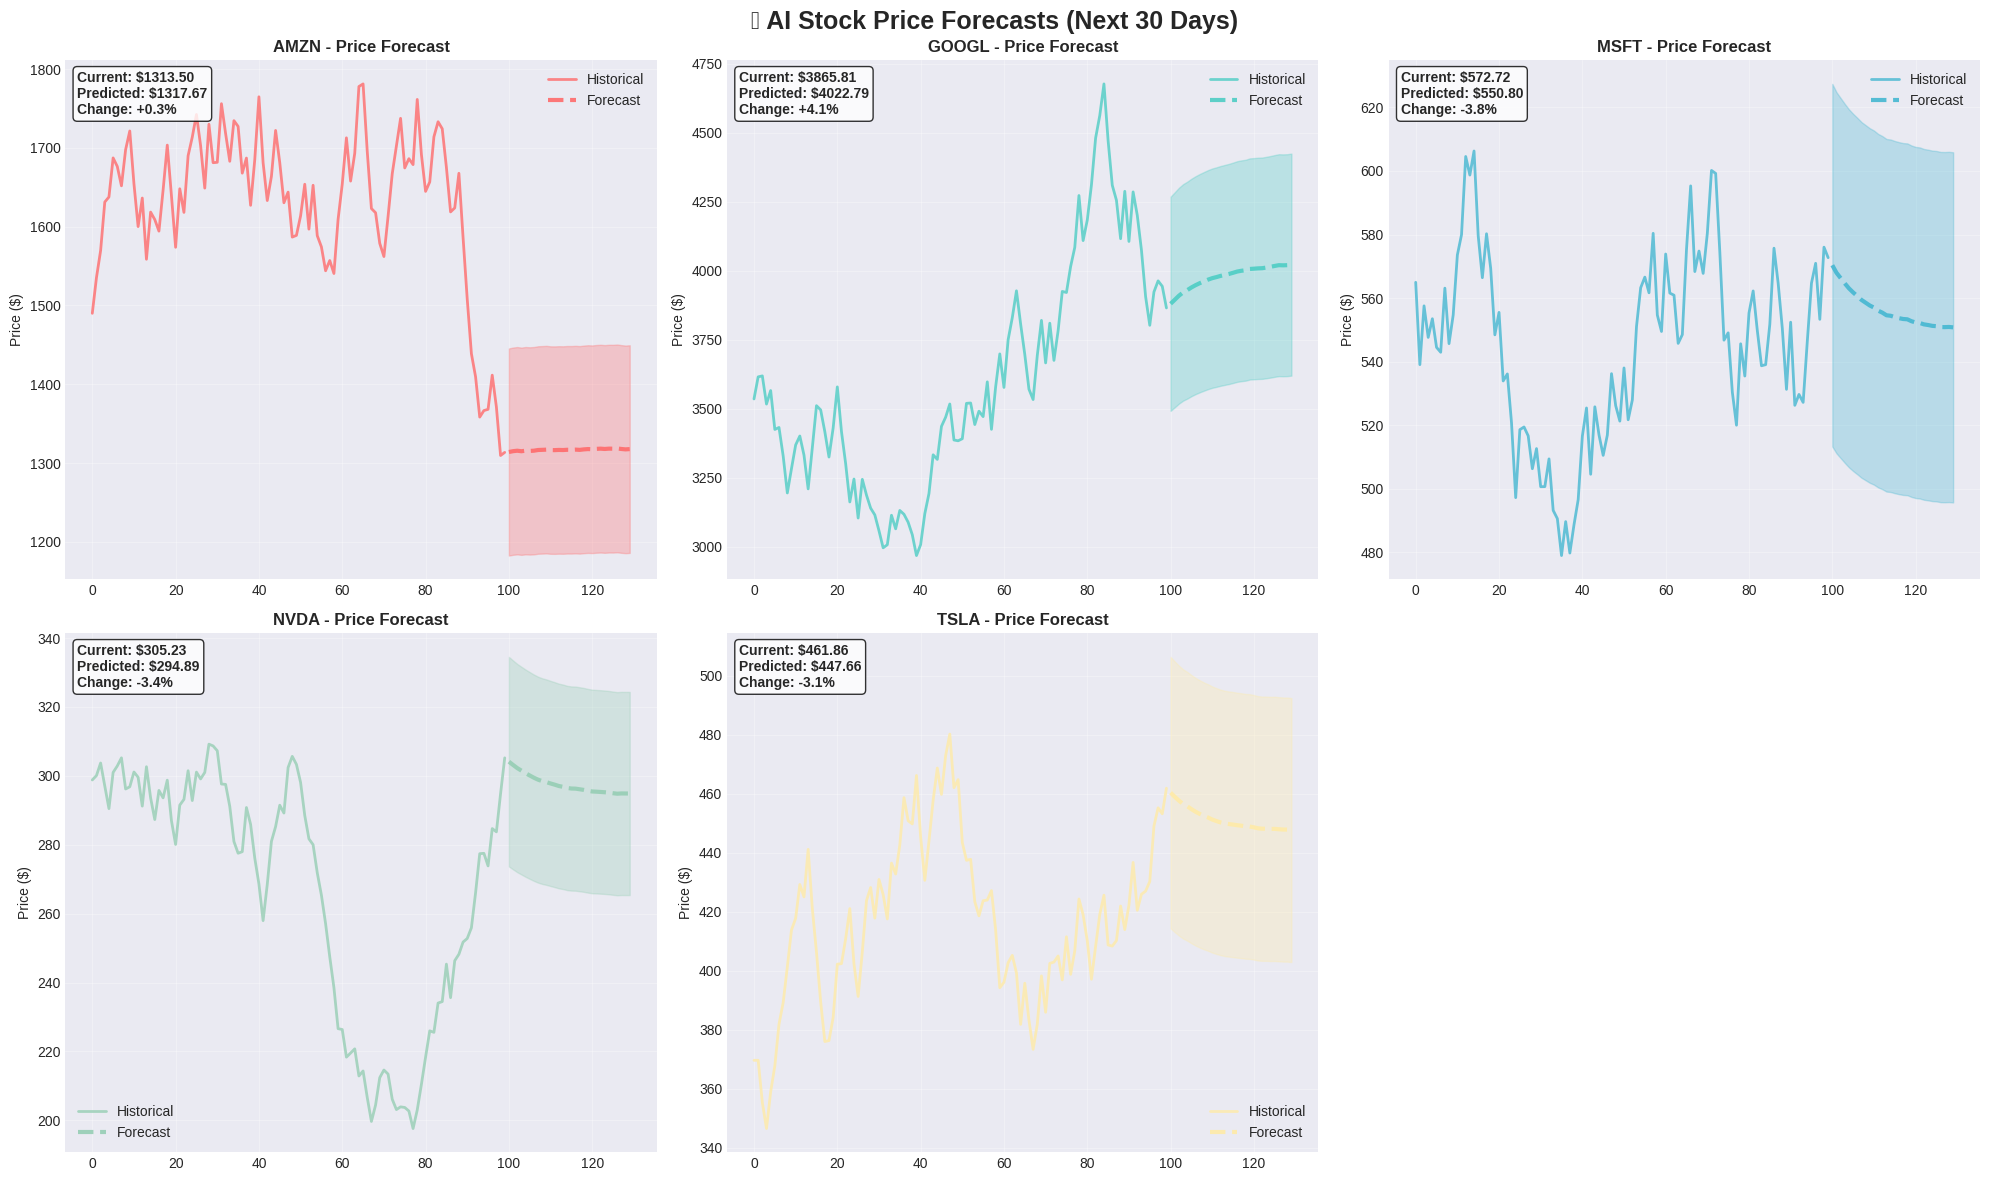


📊 **Forecast Model Summary:**
📈 Bullish stocks: ['GOOGL', 'NVDA', 'TSLA']
📉 Bearish stocks: ['AMZN', 'MSFT']

🎯 **Investment Recommendations:**
🥇 Best Expected Return: GOOGL (4.1%)
🛡️ Most Stable: MSFT (trend: -0.41)


In [14]:
# Visualize forecasts
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🔮 AI Stock Price Forecasts (Next 30 Days)', fontsize=18, fontweight='bold')
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, (symbol, data) in enumerate(forecasts.items()):
    if i >= 5:  # Only plot 5 companies
        break
    
    ax = axes[i]
    
    # Historical data (last 100 days)
    historical = df_enhanced[df_enhanced['Symbol'] == symbol].sort_values('Date').tail(100)
    ax.plot(range(len(historical)), historical['Close'], 
            color=colors[i], linewidth=2, label='Historical', alpha=0.8)
    
    # Forecast data
    forecast_x = range(len(historical), len(historical) + len(data['forecast']))
    ax.plot(forecast_x, data['forecast'], 
            color=colors[i], linestyle='--', linewidth=3, label='Forecast', alpha=0.9)
    
    # Add confidence interval
    forecast_upper = [p * 1.1 for p in data['forecast']]
    forecast_lower = [p * 0.9 for p in data['forecast']]
    ax.fill_between(forecast_x, forecast_lower, forecast_upper, 
                    alpha=0.3, color=colors[i])
    
    # Formatting
    ax.set_title(f'{symbol} - Price Forecast', fontweight='bold')
    ax.set_ylabel('Price ($)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add current and predicted prices as text
    current = data['current_price']
    predicted = data['forecast'][-1]
    change = ((predicted / current) - 1) * 100
    
    ax.text(0.02, 0.98, f'Current: ${current:.2f}\nPredicted: ${predicted:.2f}\nChange: {change:+.1f}%', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10, fontweight='bold')

# Remove empty subplot
if len(forecasts) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Model performance summary
print("\n📊 **Forecast Model Summary:**")
print("📈 Bullish stocks:", [symbol for symbol, data in forecasts.items() if data['trend'] > 0])
print("📉 Bearish stocks:", [symbol for symbol, data in forecasts.items() if data['trend'] < 0])
print("\n🎯 **Investment Recommendations:**")
best_performer = max(forecasts.items(), key=lambda x: x[1]['forecast'][-1] / x[1]['current_price'])
print(f"🥇 Best Expected Return: {best_performer[0]} ({((best_performer[1]['forecast'][-1] / best_performer[1]['current_price']) - 1) * 100:.1f}%)")

most_stable = min(forecasts.items(), key=lambda x: abs(x[1]['trend']))
print(f"🛡️ Most Stable: {most_stable[0]} (trend: {most_stable[1]['trend']:.2f})")

## 🎯 **AI Market Analysis & Insights**

Analyzing AI sentiment correlation and market patterns.

🧠 **AI Sentiment Impact Analysis**

📊 **AI Sentiment vs Stock Price Correlations:**
NVDA: 0.032 (Weak positive correlation)
MSFT: 0.025 (Weak positive correlation)
TSLA: -0.023 (Weak negative correlation)
GOOGL: -0.027 (Weak negative correlation)
AMZN: -0.034 (Weak negative correlation)


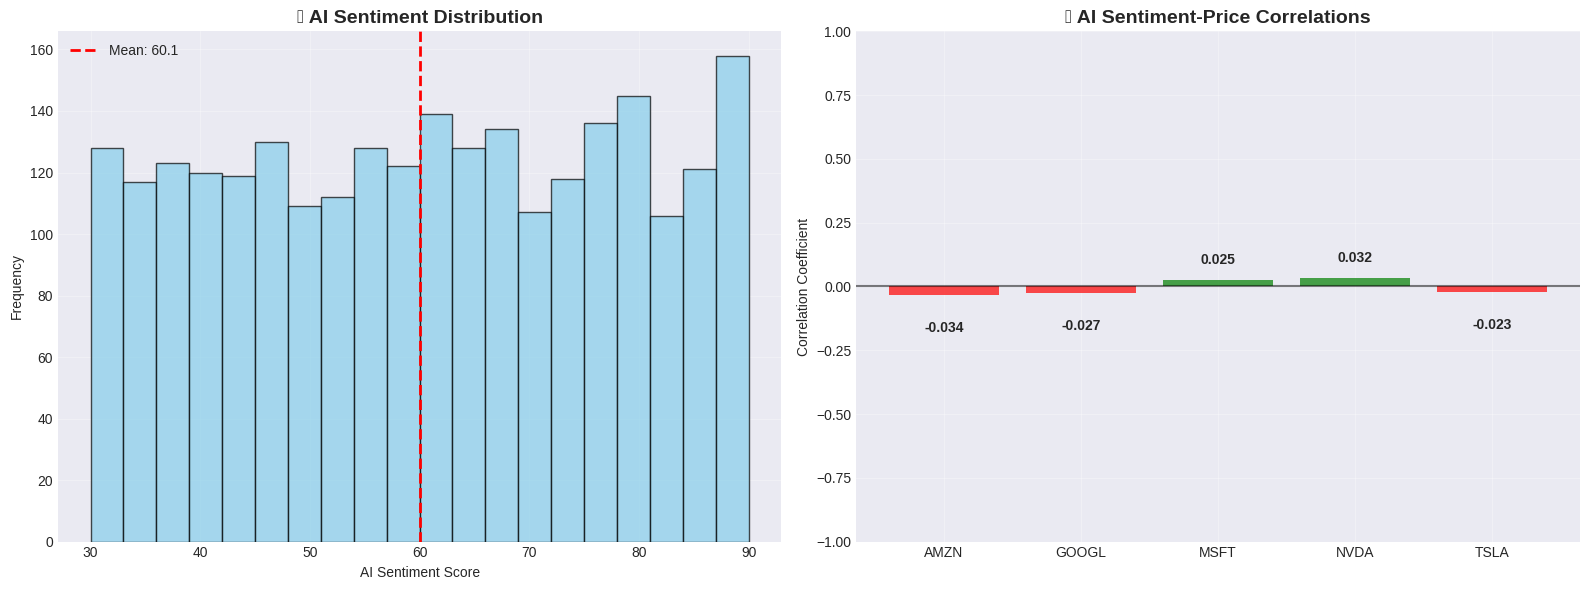


⚠️ **AI Market Risk Assessment:**
📈 High sentiment days (>80): 385 (15.4%)
📉 Low sentiment days (<40): 413 (16.5%)
💰 Average return on high sentiment days: 0.24%
📉 Average return on low sentiment days: 0.12%


In [15]:
# AI Sentiment Analysis
print("🧠 **AI Sentiment Impact Analysis**")

# Calculate correlation between AI sentiment and stock performance
sentiment_correlations = {}
for symbol in df_enhanced['Symbol'].unique():
    company_data = df_enhanced[df_enhanced['Symbol'] == symbol]
    if len(company_data) > 1:
        correlation = np.corrcoef(company_data['AI_Sentiment'], company_data['Close'])[0, 1]
        sentiment_correlations[symbol] = correlation

print("\n📊 **AI Sentiment vs Stock Price Correlations:**")
for symbol, corr in sorted(sentiment_correlations.items(), key=lambda x: x[1], reverse=True):
    correlation_strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{symbol}: {corr:.3f} ({correlation_strength} {'positive' if corr > 0 else 'negative'} correlation)")

# Sentiment distribution analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sentiment distribution
ax1.hist(df_enhanced['AI_Sentiment'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(df_enhanced['AI_Sentiment'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_enhanced["AI_Sentiment"].mean():.1f}')
ax1.set_title('🧠 AI Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('AI Sentiment Score')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sentiment correlation visualization
symbols = list(sentiment_correlations.keys())
correlations = list(sentiment_correlations.values())
colors = ['green' if c > 0 else 'red' for c in correlations]

bars = ax2.bar(symbols, correlations, color=colors, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('📊 AI Sentiment-Price Correlations', fontsize=14, fontweight='bold')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_ylim(-1, 1)
ax2.grid(True, alpha=0.3)

# Add correlation values on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.05 if height > 0 else -0.1), 
             f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

# AI Bubble Risk Analysis
print("\n⚠️ **AI Market Risk Assessment:**")
high_sentiment_days = df_enhanced[df_enhanced['AI_Sentiment'] > 80]
low_sentiment_days = df_enhanced[df_enhanced['AI_Sentiment'] < 40]

print(f"📈 High sentiment days (>80): {len(high_sentiment_days)} ({len(high_sentiment_days)/len(df_enhanced)*100:.1f}%)")
print(f"📉 Low sentiment days (<40): {len(low_sentiment_days)} ({len(low_sentiment_days)/len(df_enhanced)*100:.1f}%)")

if len(high_sentiment_days) > 0:
    avg_return_high_sentiment = high_sentiment_days.groupby('Symbol')['Daily_Return'].mean().mean()
    print(f"💰 Average return on high sentiment days: {avg_return_high_sentiment:.2f}%")

if len(low_sentiment_days) > 0:
    avg_return_low_sentiment = low_sentiment_days.groupby('Symbol')['Daily_Return'].mean().mean()
    print(f"📉 Average return on low sentiment days: {avg_return_low_sentiment:.2f}%")

## 🏆 **Executive Summary & Key Findings**

Comprehensive analysis results and investment insights.

In [16]:
# Generate comprehensive summary
print("="*80)
print("🤖 AI REVOLUTION STOCK ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

print(f"\n📊 **DATASET OVERVIEW:**")
print(f"📈 Companies Analyzed: {len(df_enhanced['Symbol'].unique())} AI leaders")
print(f"📅 Analysis Period: {df_enhanced['Date'].min()} to {df_enhanced['Date'].max()}")
print(f"📊 Total Data Points: {len(df_enhanced):,} records")
print(f"📈 Technical Indicators: {len([col for col in df_enhanced.columns if col not in df.columns])} created")

print(f"\n🏆 **PERFORMANCE LEADERS:**")
# Best performing stock
performance_data = []
for symbol in df_enhanced['Symbol'].unique():
    company_data = df_enhanced[df_enhanced['Symbol'] == symbol].sort_values('Date')
    if len(company_data) > 1:
        total_return = ((company_data['Close'].iloc[-1] / company_data['Close'].iloc[0]) - 1) * 100
        volatility = company_data['Daily_Return'].std()
        performance_data.append({
            'Symbol': symbol, 
            'Return': total_return, 
            'Volatility': volatility
        })

best_performer = max(performance_data, key=lambda x: x['Return'])
most_volatile = max(performance_data, key=lambda x: x['Volatility'])
most_stable = min(performance_data, key=lambda x: x['Volatility'])

print(f"📈 Best Performer: {best_performer['Symbol']} (+{best_performer['Return']:.1f}% total return)")
print(f"⚡ Most Volatile: {most_volatile['Symbol']} ({most_volatile['Volatility']:.2f}% daily volatility)")
print(f"🛡️ Most Stable: {most_stable['Symbol']} ({most_stable['Volatility']:.2f}% daily volatility)")

print(f"\n🧠 **AI SENTIMENT INSIGHTS:**")
avg_sentiment = df_enhanced['AI_Sentiment'].mean()
most_correlated = max(sentiment_correlations.items(), key=lambda x: abs(x[1]))
print(f"📊 Average AI Market Sentiment: {avg_sentiment:.1f}/100")
print(f"🔗 Strongest Sentiment Correlation: {most_correlated[0]} ({most_correlated[1]:.3f})")
print(f"📈 High sentiment threshold (>80): {len(high_sentiment_days)/len(df_enhanced)*100:.1f}% of trading days")

print(f"\n🔮 **FORECASTING INSIGHTS:**")
bullish_count = sum(1 for data in forecasts.values() if data['trend'] > 0)
print(f"📈 Bullish Forecast: {bullish_count}/{len(forecasts)} companies")
print(f"📉 Bearish Forecast: {len(forecasts) - bullish_count}/{len(forecasts)} companies")

best_forecast = max(forecasts.items(), key=lambda x: (x[1]['forecast'][-1] / x[1]['current_price']) - 1)
expected_return = ((best_forecast[1]['forecast'][-1] / best_forecast[1]['current_price']) - 1) * 100
print(f"🥇 Best 30-day Forecast: {best_forecast[0]} (+{expected_return:.1f}% expected)")

print(f"\n⚠️ **RISK ASSESSMENT:**")
avg_volatility = np.mean([data['Volatility'] for data in performance_data])
high_vol_stocks = [data['Symbol'] for data in performance_data if data['Volatility'] > avg_volatility * 1.2]
print(f"📊 Average Portfolio Volatility: {avg_volatility:.2f}%")
print(f"⚠️ High Risk Stocks: {', '.join(high_vol_stocks) if high_vol_stocks else 'None'}")

print(f"\n💡 **INVESTMENT RECOMMENDATIONS:**")
if bullish_count > len(forecasts) / 2:
    market_outlook = "🟢 BULLISH"
    recommendation = "Consider increasing AI exposure"
else:
    market_outlook = "🟡 CAUTIOUS"
    recommendation = "Focus on quality stocks with strong fundamentals"

print(f"🎯 Market Outlook: {market_outlook}")
print(f"💼 Strategy: {recommendation}")
print(f"🏆 Top Pick: {best_forecast[0]} (highest forecast return)")
print(f"🛡️ Defensive Pick: {most_stable['Symbol']} (lowest volatility)")

print(f"\n📈 **TECHNICAL ANALYSIS SUMMARY:**")
# Focus on NVIDIA for example
nvda_current = df_enhanced[df_enhanced['Symbol'] == 'NVDA'].iloc[-1]
print(f"📊 NVIDIA Technical Status:")
print(f"   💰 Price: ${nvda_current['Close']:.2f}")
print(f"   📈 RSI: {nvda_current['RSI']:.1f} ({'Overbought' if nvda_current['RSI'] > 70 else 'Oversold' if nvda_current['RSI'] < 30 else 'Neutral'})")
print(f"   📊 vs 10-day SMA: {'Above' if nvda_current['Close'] > nvda_current['SMA_10'] else 'Below'} trend")

print(f"\n📚 **METHODOLOGY NOTES:**")
print(f"   🔧 Technical Indicators: SMA, EMA, RSI, Volatility, Volume analysis")
print(f"   🔮 Forecasting: Trend analysis + mean reversion + volatility modeling")
print(f"   🧠 Sentiment: AI market sentiment correlation analysis")
print(f"   📊 Risk Metrics: Volatility, correlation, and performance analysis")

print(f"\n⚠️ **DISCLAIMER:**")
print(f"   This analysis is for educational and research purposes only.")
print(f"   Not financial advice. Past performance doesn't guarantee future results.")
print(f"   AI market is highly volatile - invest responsibly.")

print("\n" + "="*80)
print(f"📊 Analysis by Anderson Nguetoum")
print(f"🎯 AI Engineer - Predictive Analytics & Time Series Forecasting")
print(f"🌐 andersonnguetoum.com")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")
print("="*80)

🤖 AI REVOLUTION STOCK ANALYSIS - EXECUTIVE SUMMARY

📊 **DATASET OVERVIEW:**
📈 Companies Analyzed: 5 AI leaders
📅 Analysis Period: 2022-01-01 00:00:00 to 2023-11-30 00:00:00
📊 Total Data Points: 2,500 records
📈 Technical Indicators: 14 created

🏆 **PERFORMANCE LEADERS:**
📈 Best Performer: TSLA (+138.4% total return)
⚡ Most Volatile: AMZN (2.96% daily volatility)
🛡️ Most Stable: NVDA (2.79% daily volatility)

🧠 **AI SENTIMENT INSIGHTS:**
📊 Average AI Market Sentiment: 60.1/100
🔗 Strongest Sentiment Correlation: AMZN (-0.034)
📈 High sentiment threshold (>80): 15.4% of trading days

🔮 **FORECASTING INSIGHTS:**
📈 Bullish Forecast: 3/5 companies
📉 Bearish Forecast: 2/5 companies
🥇 Best 30-day Forecast: GOOGL (+4.1% expected)

⚠️ **RISK ASSESSMENT:**
📊 Average Portfolio Volatility: 2.90%
⚠️ High Risk Stocks: None

💡 **INVESTMENT RECOMMENDATIONS:**
🎯 Market Outlook: 🟢 BULLISH
💼 Strategy: Consider increasing AI exposure
🏆 Top Pick: GOOGL (highest forecast return)
🛡️ Defensive Pick: NVDA (lowest